In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

ROOT_DIR = Path().resolve(strict=True).parent
DATA_DIR = f"{ROOT_DIR}/data/"

null_filled_df = pd.read_csv(f"{DATA_DIR}/interim/new_features.csv", index_col=0)


In [2]:
null_filled_df.loc[null_filled_df['Ticker'] == null_filled_df['Ticker'].shift(periods=-1), 'next_year_revenue'] = null_filled_df['Revenue'].shift(periods=-1)

train_df = null_filled_df[(null_filled_df["Fiscal Year"] <= 2017) & (null_filled_df["Fiscal Year"] >= 2010)].dropna(subset = ['next_year_revenue'])
train_df = train_df.dropna(subset = ['next_year_revenue'])
test_df = null_filled_df[(null_filled_df["Fiscal Year"] <= 2019) & (null_filled_df["Fiscal Year"] >= 2018)]
test_df = test_df.dropna(subset = ['next_year_revenue'])
train_df = train_df.drop(columns=["Fiscal Year", "Ticker"])
test_df = test_df.drop(columns=["Fiscal Year", "Ticker"])

y_train=train_df['next_year_revenue']
X_train=train_df.drop(['next_year_revenue'],axis=1)
y_test=test_df['next_year_revenue']
X_test=test_df.drop(['next_year_revenue'],axis=1)

In [3]:
import xgboost
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [4]:
from sklearn.ensemble import RandomForestRegressor
random_forrest_reg = RandomForestRegressor(max_depth=2, random_state=0)
random_forrest_reg.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=0)

In [5]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

Ridge()

In [6]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Always scale the input. The most convenient way is to use a pipeline.
sdg_reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
sdg_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [7]:
from sklearn import linear_model
lars_reg = linear_model.Lars(n_nonzero_coefs=1)
lars_reg.fit(X_train, y_train)

/home/lucas/Dev/earnings_predictions/epvenv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Lars(n_nonzero_coefs=1)

In [8]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svr_reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr_reg.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [9]:
from sklearn.linear_model import TheilSenRegressor
theil_sen_reg = TheilSenRegressor(random_state=0).fit(X_train, y_train)

In [10]:
xg_classifier = xgboost.XGBRegressor()
xg_classifier.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [11]:

poly_regs= PolynomialFeatures(degree= 2)  
x_poly= poly_regs.fit_transform(X_train)  
lin_reg =LinearRegression()
lin_reg_poly = lin_reg.fit(x_poly, y_train)
lin_reg.fit(X_train, y_train) 

LinearRegression()

In [12]:
dec_tre_reg = DecisionTreeRegressor(max_depth=2)
dec_tre_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [13]:
xg_pred = xg_classifier.predict(X_test)
dec_tre_reg_pred = dec_tre_reg.predict(X_test)
lin_reg_pred = lin_reg.predict(X_test)
lin_reg_poly_pred = lin_reg_poly.predict(X_test)
random_forrest_reg_pred = random_forrest_reg.predict(X_test)
ridge_reg_pred = ridge_reg.predict(X_test)
sdg_reg_pred = sdg_reg.predict(X_test)
lars_reg_pred = lars_reg.predict(X_test)
svr_reg_pred = svr_reg.predict(X_test)
theil_sen_reg_pred = theil_sen_reg.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, classification_report

In [15]:
results_dict = {
    "xg_classifier": {"model":xg_classifier,"pred": xg_pred,},
    "dec_tre_reg": {"model":dec_tre_reg,"pred": dec_tre_reg_pred,},
    "lin_reg": {"model":lin_reg,"pred": lin_reg_pred,},
    "lin_reg_poly": {"model":lin_reg_poly,"pred": lin_reg_poly_pred,},
    "random_forrest_reg": {"model":random_forrest_reg,"pred": random_forrest_reg_pred,},
    "ridge_reg": {"model":ridge_reg,"pred": ridge_reg_pred,},
    "sdg_reg": {"model":sdg_reg,"pred": sdg_reg_pred,},
    "lars_reg": {"model":lars_reg,"pred": lars_reg_pred,},
    "svr_reg": {"model":svr_reg,"pred": svr_reg_pred,},
    "theil_sen_reg": {"model":theil_sen_reg,"pred": theil_sen_reg_pred,},
}

In [16]:
for key, value in results_dict.items():
    model = results_dict[key]["model"]
    pred = results_dict[key]["pred"]
    results_dict[key] = {
        "score": model.score(X_train, y_train),
        "r2_score": r2_score(y_test, pred),
        "mean_squared_error": mean_squared_error(y_test, pred),
        # "classification_report": classification_report(y_test, pred)

    }

In [31]:
from statistics import mean

In [47]:
best_score = []
best_r2 = []
best_mse = []
for key, value in results_dict.items():
    score = results_dict[key]["score"]
    r2 = results_dict[key]["r2_score"]
    mse = results_dict[key]["mean_squared_error"]
    best_score.append(score)
    best_r2.append(r2)
    best_mse.append(mse)

best_score.sort(reverse=True)
best_r2.sort(reverse=True)
best_mse.sort(reverse=True)

for key, value in results_dict.items():
    score = results_dict[key]["score"]
    r2 = results_dict[key]["r2_score"]
    mse = results_dict[key]["mean_squared_error"]

    best_score_index = best_score.index(score) + 1
    best_r2_index = best_r2.index(r2) + 1
    best_mse_index = best_mse.index(mse) + 1
    results_dict[key]["score_position"] = best_score_index
    results_dict[key]["r2_score_position"] = best_r2_index
    results_dict[key]["mean_squared_error_position"] = best_mse_index
    results_dict[key]["average_position"] = mean([best_score_index, best_r2_index, best_mse_index])



In [50]:
{key: results_dict[key]["average_position"] for key in results_dict.keys()}

{'xg_classifier': 4,
 'dec_tre_reg': 6,
 'lin_reg': 4,
 'lin_reg_poly': 4,
 'random_forrest_reg': 5.666666666666667,
 'ridge_reg': 5,
 'sdg_reg': 7,
 'lars_reg': 5.333333333333333,
 'svr_reg': 6.666666666666667,
 'theil_sen_reg': 6.333333333333333}

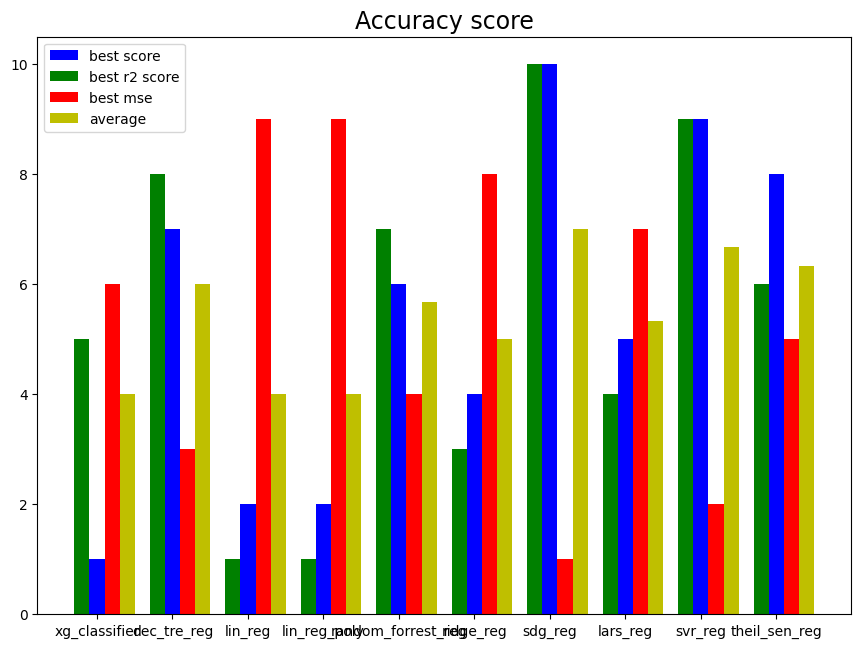

In [49]:
import matplotlib.pyplot as plt

X = np.arange(len(results_dict))
ax = plt.subplot(111)
fig = plt.gcf()
fig.set_size_inches(10.5, 7.5)
# fig.savefig('test2png.png', dpi=100)
ax.bar(X, [results_dict[key]["score_position"] for key in results_dict.keys()], width=0.2, color='b', align='center')
ax.bar(X-0.2, [results_dict[key]["r2_score_position"] for key in results_dict.keys()], width=0.2, color='g', align='center')
ax.bar(X+0.2, [results_dict[key]["mean_squared_error_position"] for key in results_dict.keys()], width=0.2, color='r', align='center')
ax.bar(X+0.4, [results_dict[key]["average_position"] for key in results_dict.keys()], width=0.2, color='y', align='center')
ax.legend(('best score','best r2 score', "best mse", "average"))
plt.xticks(X, results_dict.keys())
plt.title("Accuracy score", fontsize=17)
plt.show()

In [53]:
results_dict.pop("sdg_reg")

{'score': -3310735974.0891542,
 'r2_score': -234056854.5557277,
 'mean_squared_error': 13886304248504.502,
 'score_position': 10,
 'r2_score_position': 10,
 'mean_squared_error_position': 1,
 'average_position': 7}

In [56]:
results_dict.pop("svr_reg")

{'score': 0.1963232055507218,
 'r2_score': 0.16177452187987829,
 'mean_squared_error': 49730.88265407708,
 'score_position': 9,
 'r2_score_position': 9,
 'mean_squared_error_position': 2,
 'average_position': 6.666666666666667}

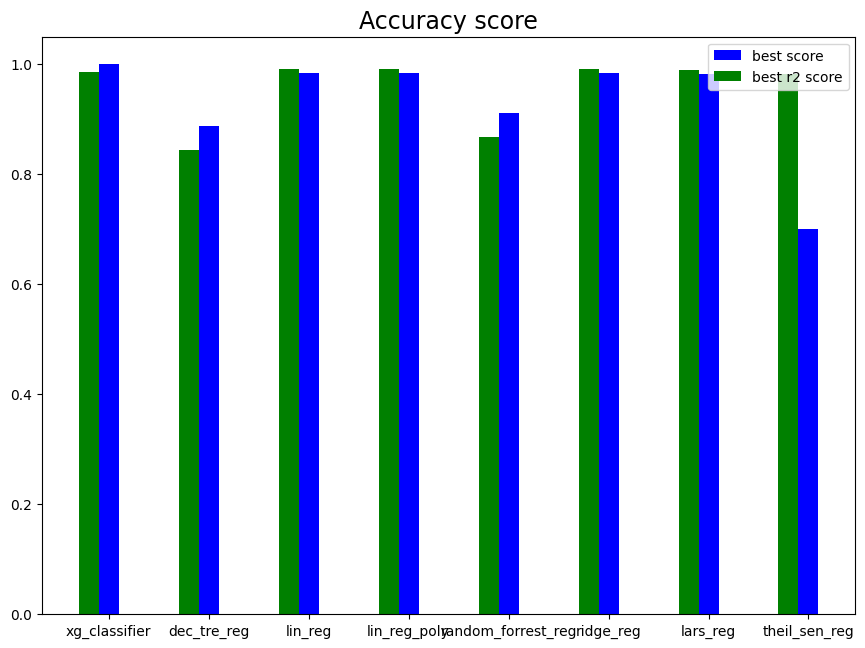

In [57]:
X = np.arange(len(results_dict))
ax = plt.subplot(111)
fig = plt.gcf()
fig.set_size_inches(10.5, 7.5)
# fig.savefig('test2png.png', dpi=100)
ax.bar(X, [results_dict[key]["score"] for key in results_dict.keys()], width=0.2, color='b', align='center')
ax.bar(X-0.2, [results_dict[key]["r2_score"] for key in results_dict.keys()], width=0.2, color='g', align='center')
ax.legend(('best score','best r2 score'))
plt.xticks(X, results_dict.keys())
plt.title("Accuracy score", fontsize=17)
plt.show()

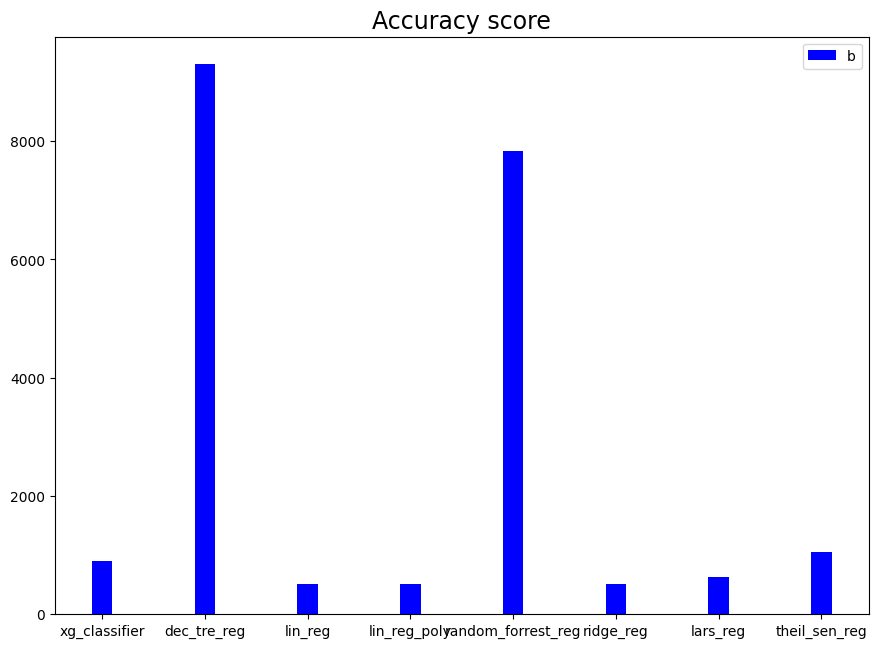

In [58]:
X = np.arange(len(results_dict))
ax = plt.subplot(111)
fig = plt.gcf()
fig.set_size_inches(10.5, 7.5)
# fig.savefig('test2png.png', dpi=100)
ax.bar(X, [results_dict[key]["mean_squared_error"] for key in results_dict.keys()], width=0.2, color='b', align='center')
ax.legend(('best mse'))
plt.xticks(X, results_dict.keys())
plt.title("Accuracy score", fontsize=17)
plt.show()